In [3]:
### Step 1: Loading the dataset
import pandas as pd
df = pd.read_csv("Students Social Media Addiction.csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [4]:
### Step 2: Data Set Structure 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


Observations: 
1. Dataset contains 705 students and 13 columns.
2. There are no missing values.
3. Mean usage is about 4.9 hours per day, and average sleep is about 6.9 hours per night, which may suggest a possible concern.
4.Avg_daily_usage_hours ranges from 1.5 to 8.5 hours/day
5.Mental_health_score ranges from 4 to 9
6. Addition_score ranges from 2 to 9


In [12]:
### Step 3: Exploring Categorical Columns
# List of all categorical columns
cat_columns=['Gender', "Academic_Level","Country","Most_Used_Platform","Affects_Academic_Performance","Relationship_Status"]

for col in cat_columns:
        print(f"--- {col} ---")
        print(df[col].value_counts())
        print()


--- Gender ---
Gender
Female    353
Male      352
Name: count, dtype: int64

--- Academic_Level ---
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64

--- Country ---
Country
India        53
USA          40
Canada       34
Denmark      27
Ireland      27
             ..
Uruguay       1
Ecuador       1
Venezuela     1
Peru          1
Jamaica       1
Name: count, Length: 110, dtype: int64

--- Most_Used_Platform ---
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dtype: int64

--- Affects_Academic_Performance ---
Affects_Academic_Performance
Yes    453
No     252
Name: count, dtype: int64

--- Relationship_Status ---
Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64



Observation:
1. Gender: perfectly balanced.
2. Academic level: Mostly are undergrad, and grad. Very small group in in highschool and we may need to exclude or grouped later.
3. Country: We have a long tail of countries with 1 participants. Long tail could lead to noisy results in country based comparisions, and we might group them as "other countries"
4. Most used platforms: Most used platformss is Instgram followed by TikTok. Platforms like WeChat, Snapchat, LINE, KakaoTalk,  VKontakte , and YouTube have between 10-15 participants so we might group them to simplify classification.
4. Affects_Academic_Performance: 453 said "yes", and 252 said "no". Its a binary variable, whcich is usable as is.
5. Relationship_Status: 384 are single, 289 are in relationship, and although complicated is 32 participants which comaparetively small, its best to keep it.



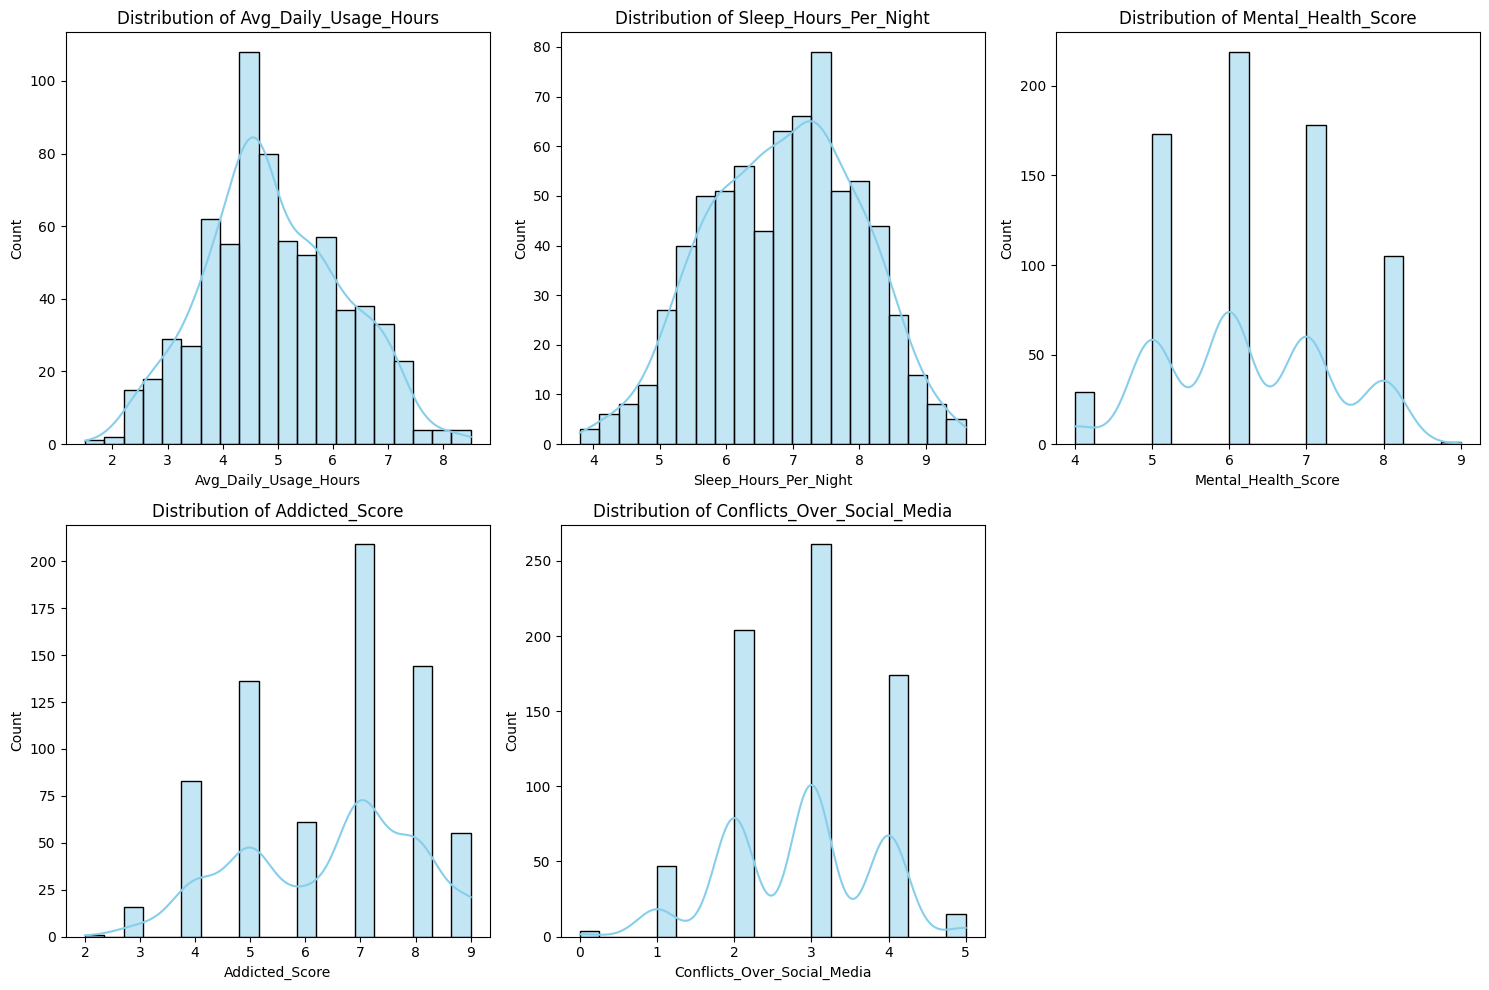

In [13]:
### Step 4: Univariate Analysis – Distributions of Key Numeric Features
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                'Mental_Health_Score', 'Addicted_Score', 'Conflicts_Over_Social_Media']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")
    
plt.tight_layout()
plt.show()

Observation: 
1. **Avg_Daily_Usage_Hours**: Seems normally distributed, centred around 5 hours/day. No strong skew or outliers, so a good sign of modelling. 
2. **Sleep_Hours_Per_Night**: Almost normally distributed, slighhtly left skewed. Most stuednts sleep 6-8 hours. Some students sleep less than 4 hours, which could be a potential wellness concern.
3. **Mental_Health_Score**: Discrete and multimodal- spikes at 3 different points(5,6, and 7). This might be survey bias, (people choosing midpoint, or precieved lack of knoweldge of mental health)
4. **Addicted_Score**: It's slightly right skewed, more stuedents rate their social media addiction on the higher end. Students are aware of their addiction
5. **Conflicts_Over_Social_Media**: Majority experiences atleast some conflict related to social media.





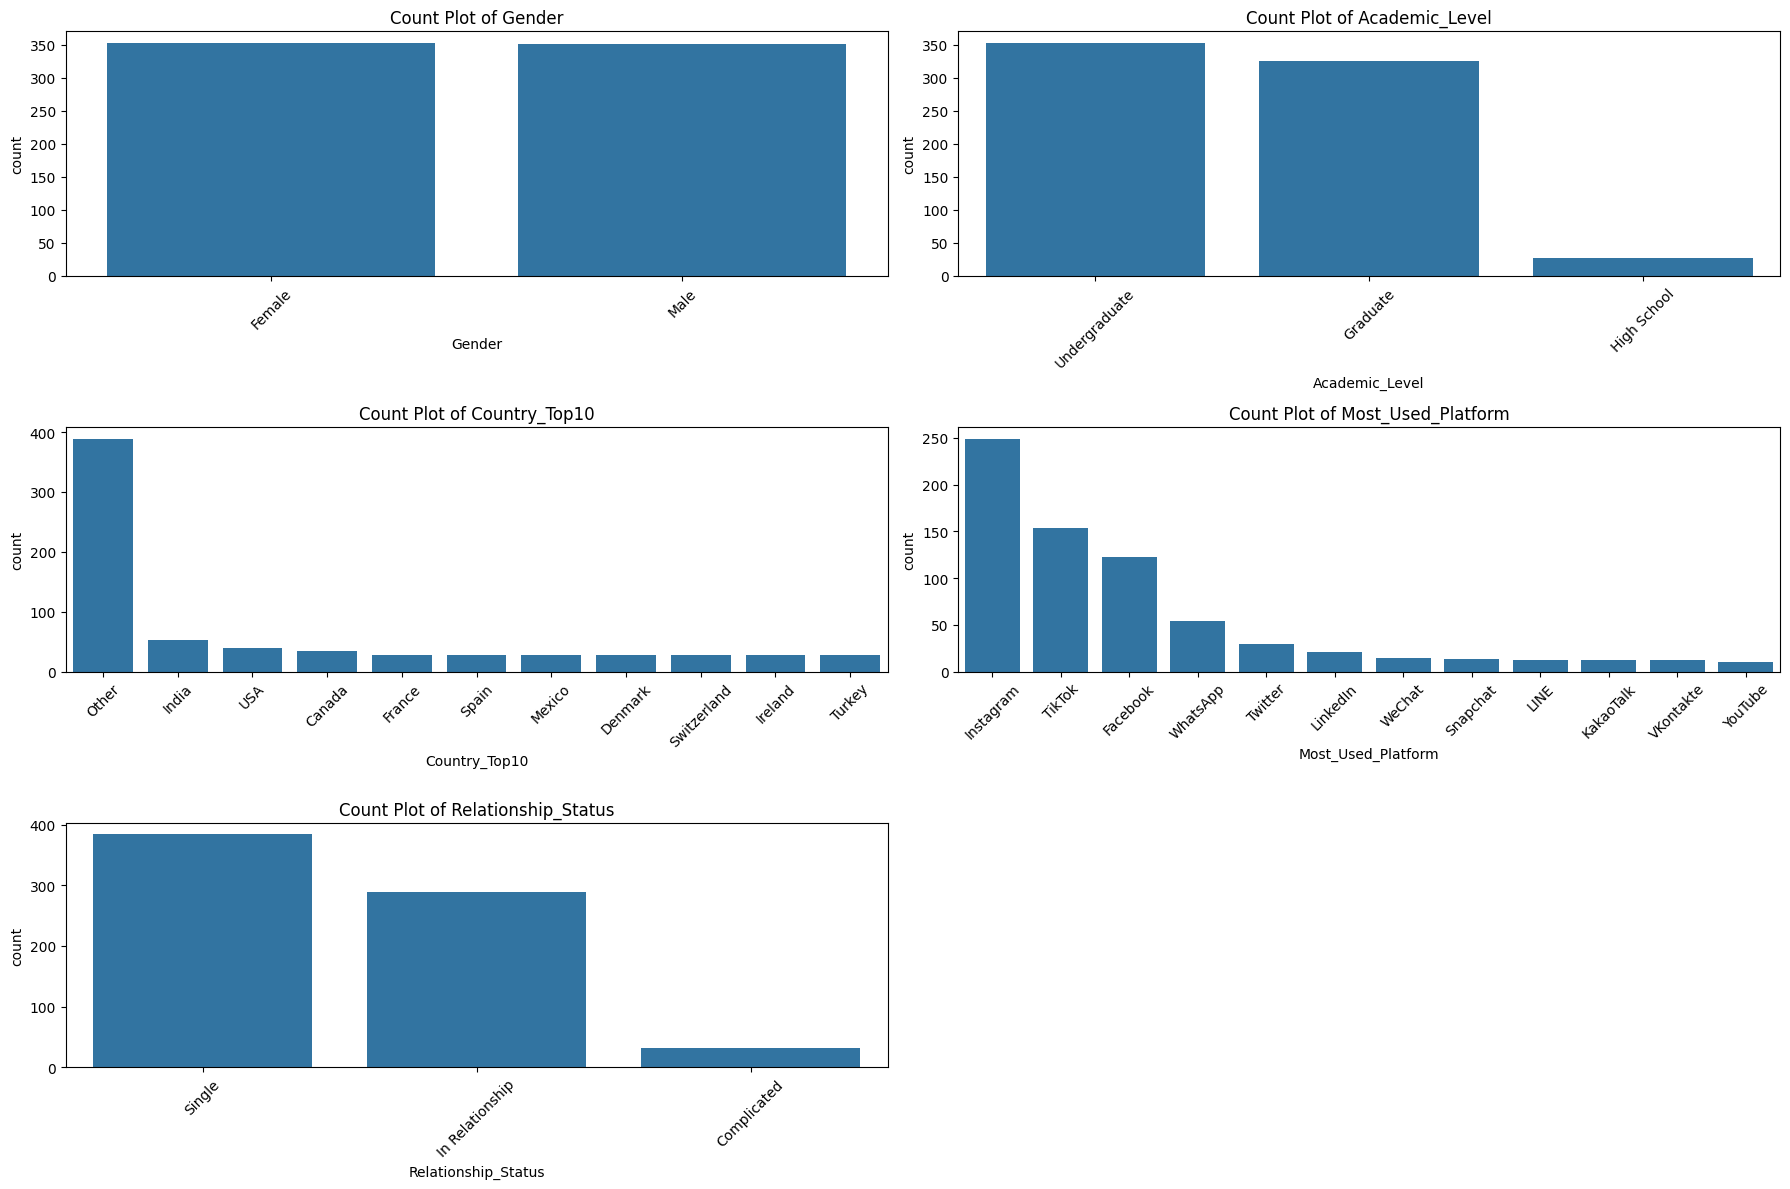

In [22]:
### Step 4: Univariate Analysis – Categorical variables

top_countries = df['Country'].value_counts().nlargest(10).index
df['Country_Top10'] = df['Country'].where(df['Country'].isin(top_countries), 'Other')

cat_cols = ['Gender', 'Academic_Level', 'Country_Top10', 
            'Most_Used_Platform', 'Relationship_Status']


plt.figure(figsize=(18, 12))

for i, col in enumerate(cat_cols):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Observation:
1. **Gender:** perfectly balanced.
2. **Academic level:** Mostly are undergrad, and grad. Very small group in in highschool and we may need to exclude or grouped later.
3. **Country:** After grouping, a large portion of students fall into the "Other" category. Top countries like India and the USA have relatively small samples.
4. **Most used platforms:** Most used platformss is Instgram followed by TikTok. Platforms like WeChat, Snapchat, LINE, KakaoTalk,  VKontakte , and YouTube have between 10-15 participants so we might group them to simplify classification.
5. **Relationship_Status:** 384 are single, 289 are in relationship, and although complicated is 32 participants which comaparetively small, its best to keep it.



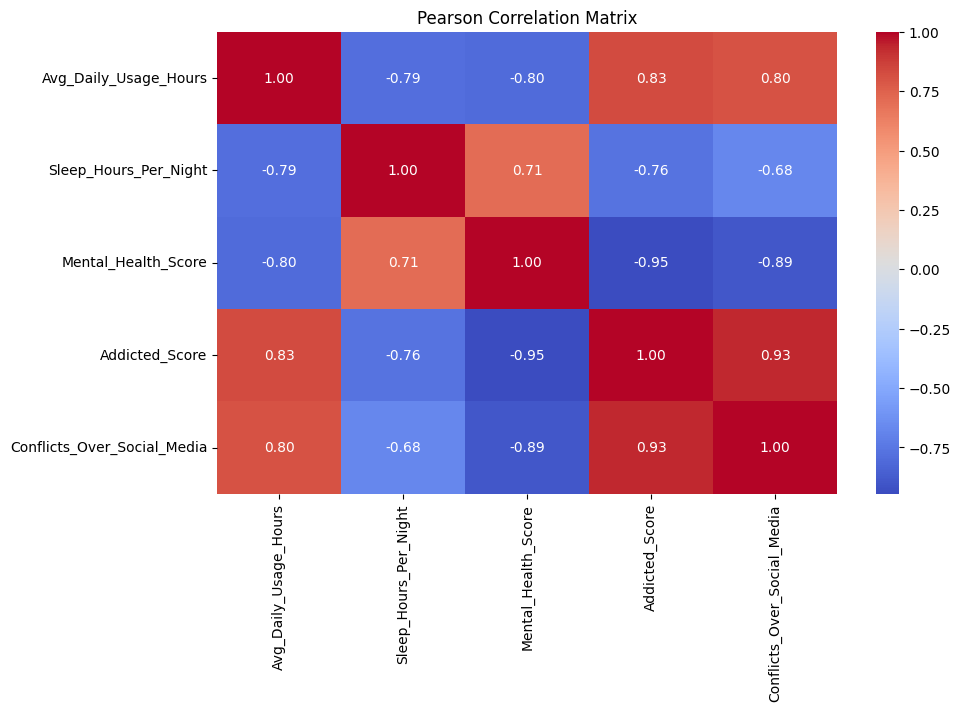

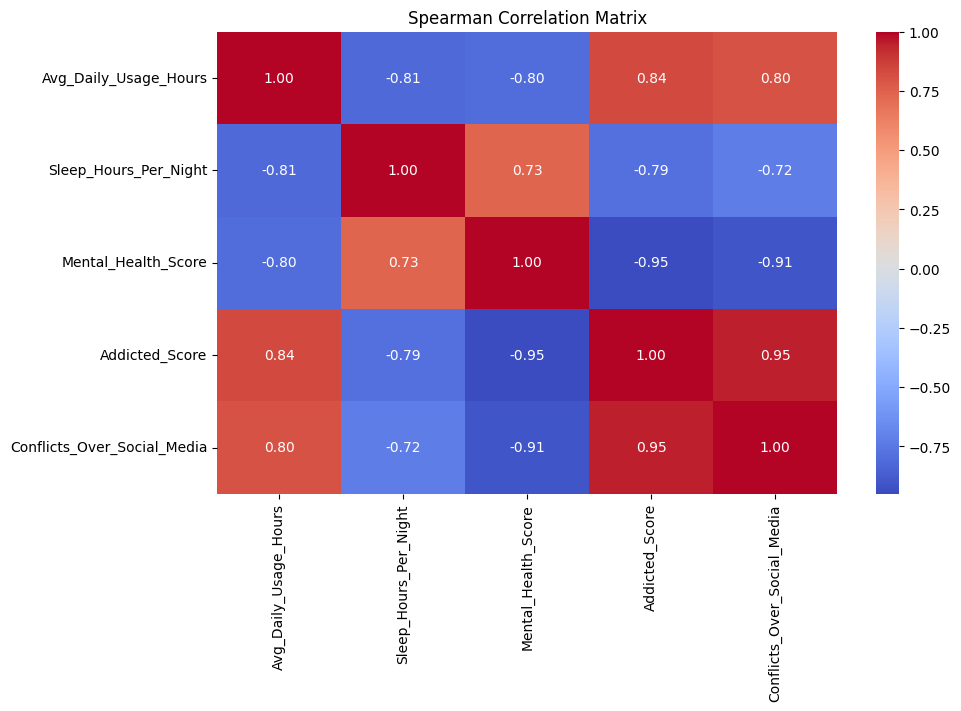

In [23]:
### Step 5: Correlation matrix - Numerical variables
# Select numeric columns only
numeric_cols = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                'Mental_Health_Score', 'Addicted_Score', 'Conflicts_Over_Social_Media']

# Pearson Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(method='pearson'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

# Spearman Correlation
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(method='spearman'), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()


Observations:
Both Pearson and Spearman correlation matrices reveal very strong relationships between key variables:

- **Addicted_Score** shows strong:
  - Positive correlation with `Avg_Daily_Usage_Hours` (Pearson: 0.83, Spearman: 0.84)
  - Negative correlation with `Mental_Health_Score` (Pearson: -0.95, Spearman: -0.95)

- **Conflicts_Over_Social_Media** shows strong:
  - Positive correlation with `Addicted_Score` (0.93, 0.95)
  - Positive correlation with `Avg_Daily_Usage_Hours` (0.80)
  - Negative correlation with `Mental_Health_Score` (-0.89 , -0.91)

- **Sleep_Hours_Per_Night** is negatively correlated with usage and addiction,
  and positively correlated with mental health.

These relationships suggest that:
- Increased social media use is linked with **higher addiction**,**more conflict**, **lower sleep**, and **lower mental health**.

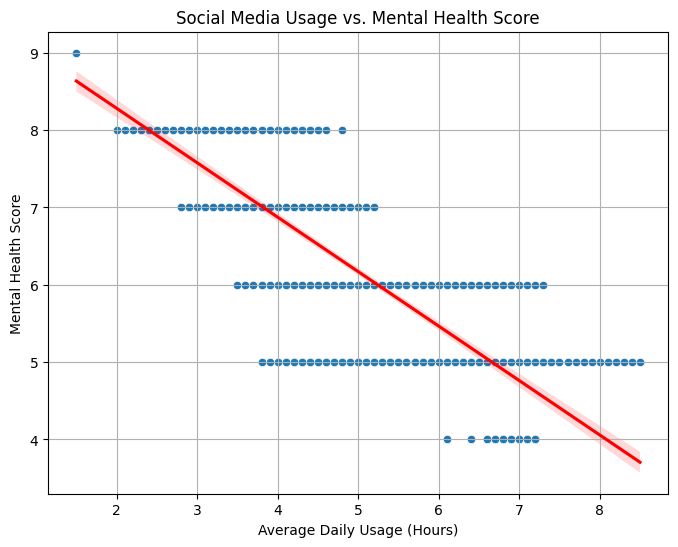

In [26]:
### Step6: Scatter Plot - Avg daily usage vs. mental health score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Avg_Daily_Usage_Hours', y='Mental_Health_Score')
sns.regplot(data=df, x='Avg_Daily_Usage_Hours', y='Mental_Health_Score', scatter=False, color='red')
plt.title("Social Media Usage vs. Mental Health Score")
plt.xlabel("Average Daily Usage (Hours)")
plt.ylabel("Mental Health Score")
plt.grid(True)
plt.show()



There is a strong negative relationship between time spent on social media and mental health scores. As daily usage increases, reported mental health is declining.

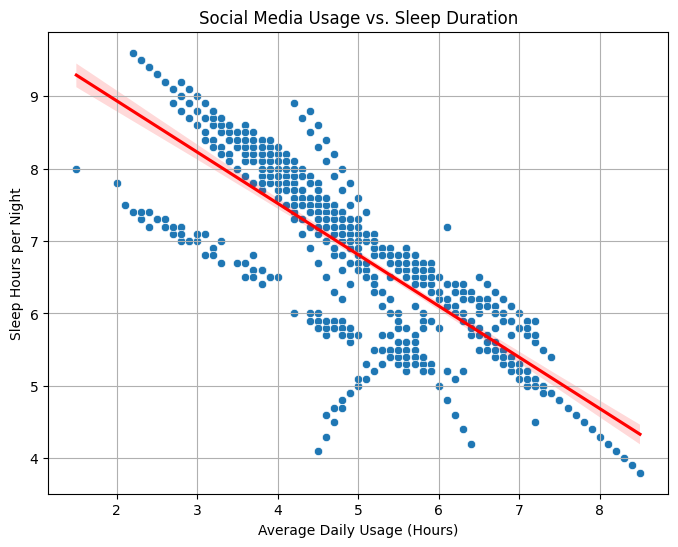

In [27]:
### Step 7: Scatter plot - Avg daily usage vs. sleep hours

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night')
sns.regplot(data=df, x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', scatter=False, color='red')
plt.title("Social Media Usage vs. Sleep Duration")
plt.xlabel("Average Daily Usage (Hours)")
plt.ylabel("Sleep Hours per Night")
plt.grid(True)
plt.show()


The scatter plot shows a strong negative trend: students who spend more time on social media tend to sleep less. Most students who use social media for 7–8 hours sleep around 4–5 hours, while those who limit usage to 2–3 hours sleep closer to 8–9 hours.


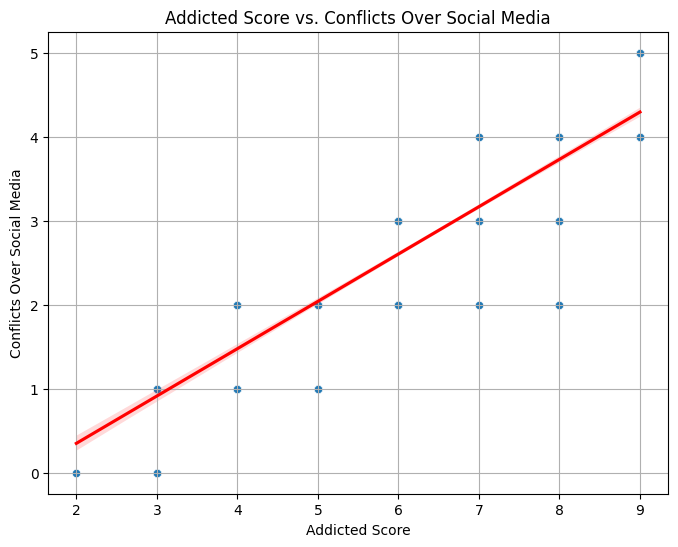

In [28]:
### Step 8: Univariate - Addition score vs conflicts over social media  
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Addicted_Score', y='Conflicts_Over_Social_Media')
sns.regplot(data=df, x='Addicted_Score', y='Conflicts_Over_Social_Media', scatter=False, color='red')
plt.title("Addicted Score vs. Conflicts Over Social Media")
plt.xlabel("Addicted Score")
plt.ylabel("Conflicts Over Social Media")
plt.grid(True)
plt.show()


This scatter plot shows a clear positive trend: as students’ self-reported addiction to social media increases, the number of conflicts they report also rises.


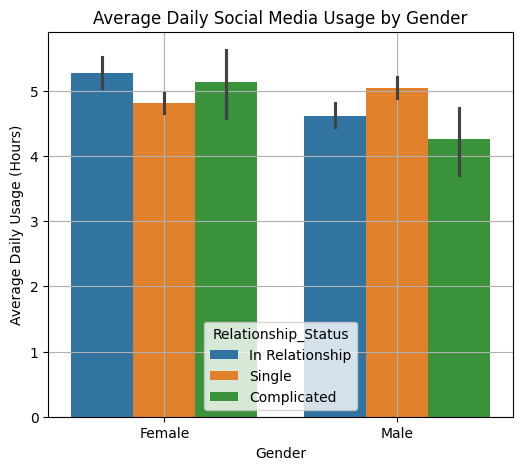

In [30]:
### Step9:  Multivariate- Avg usage by gender
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='Gender', y='Avg_Daily_Usage_Hours', hue="Relationship_Status")
plt.title("Average Daily Social Media Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Daily Usage (Hours)")
plt.grid(True)
plt.show()


Observations:
1. Female students in relationhip have the highest usage.
2. Male in complicated relationships report the lowest usage.

This suggests that relationship dynamics may influence online behaviour for male and female students.

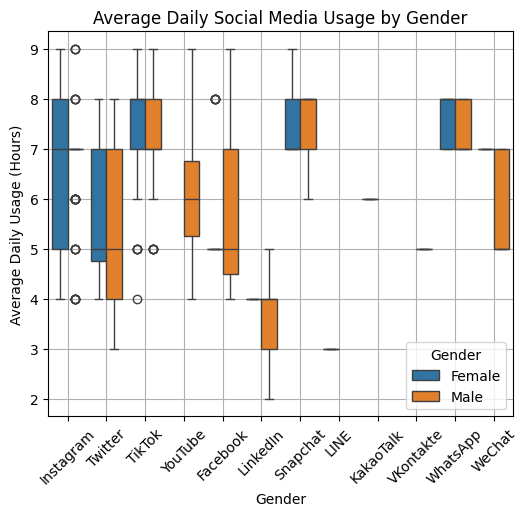

In [36]:
### Step 9: Multivariate - Gender and most used platforms
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='Most_Used_Platform', y='Addicted_Score', hue='Gender')
plt.title("Average Daily Social Media Usage by Gender")
plt.xlabel("Gender")
plt.xticks(rotation=45)
plt.ylabel("Average Daily Usage (Hours)")
plt.grid(True)
plt.show()



Observation:
The boxplot compares daily social media usage across platforms, split by gender.
1. **Instagram** have the widest range of usage and higher medians across female students.
2. **TikTok** shows consistent usage levels across both genders, with relatively low variability.




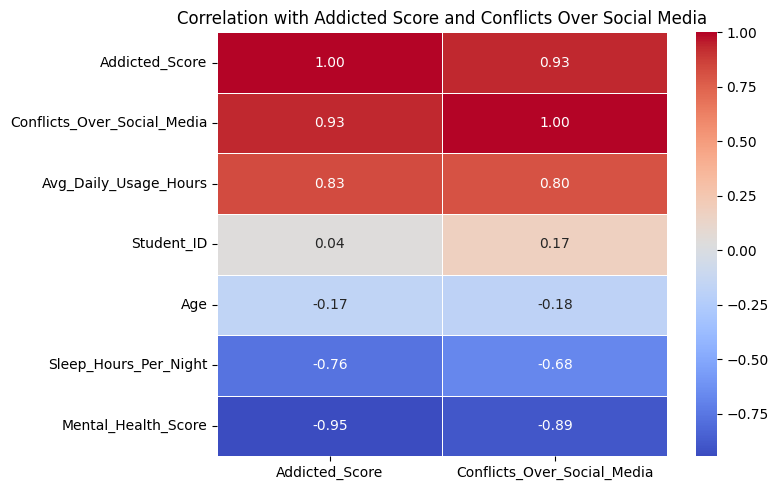

In [37]:
### Step 10: Correlation Heatmap – Target Variables
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Focus only on correlations with the two target variables
target_vars = ['Addicted_Score', 'Conflicts_Over_Social_Media']
focused_corr = corr[target_vars].sort_values(by='Addicted_Score', ascending=False)

# Plot
plt.figure(figsize=(8, 5))
sns.heatmap(focused_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation with Addicted Score and Conflicts Over Social Media")
plt.tight_layout()
plt.show()


This heatmap shows how strongly other variables are related to:
1. Addicted Score
2. Conflicts Over Social Media

- More time spent on social media is linked to both higher addiction and more interpersonal conflicts.

- Less sleep and lower mental health are also strongly associated with higher addiction and conflict levels.

- Mental health shows an extremely strong negative correlation with addiction — suggesting possible overlap, or that addiction may be impacting mental well-being.

- Variables like Age and Student_ID show very weak associations and may be dropped from further modeling or analysis.
